Einstein Temperature(K): 455
Debye Temperature(K): 700


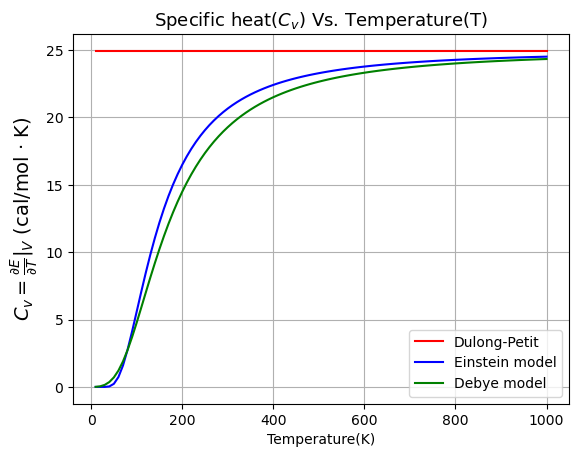

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

k = 1.38e-23
N = 6.023e23

T_E = float(input('Einstein Temperature(K): '))
T_D = float(input('Debye Temperature(K): '))

def debye_integrand(x):
    return x**4 * np.exp(x) / (np.exp(x) - 1)**2

T_values = range(10, 1010, 10)
DP_values = [3*N*k] * len(T_values) 
E_values = []
D_values = []
for T in T_values: 
    a = T_E / T
    E = ((3*N*k)*(a**2)*(np.exp(a)))/((np.exp(a)-1)**2) 
    E_values.append(E)
    
    integral, _ = quad(debye_integrand, 0, T_D/T)
    D = 9*N*k*(T/T_D)**3 * integral                  
    D_values.append(D)
    
plt.plot(T_values, DP_values, 'r')
plt.plot(T_values, E_values, 'b')
plt.plot(T_values, D_values, 'g')
plt.legend(["Dulong-Petit", "Einstein model","Debye model"], loc ="lower right")
plt.xlabel('Temperature(K)')
plt.ylabel(r'$C_v = \left. \frac{\partial E}{\partial T} \right |_V$ (cal/mol · K)', fontsize=14)
plt.title('Specific heat($C_v$) Vs. Temperature(T)', fontsize=13)
plt.grid()
plt.show()
